# Outline
1. [Frame the probelm and look at the big picture ](#1)
2. [Get the Data](#2)
3. [Explore the data to gain insights](#3)
4. [Prepare the data to better expose the underlying patterns to Machine Learning algorithms](#4)
5. [Explore many different models and short-list the best ones](#5)
6. [Fine-tune your models and combine them into a great solution](#6)
7. [Present your solution](#7)
8. [Launch, monitor, and maintain your system](#8)


<a name='1'></a>
# 1. Frame the Problem and look at the big picture
Use a Neural Network model that can identify hand written digits, using the MNIST dataset.


In [23]:
# Get the data.
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# To split the data.
from sklearn.model_selection import StratifiedShuffleSplit

# Import numpy to work with numpy arrays.
import numpy as np

# Import tensorflow & functions to create the Neural Network.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu


%matplotlib widget
import matplotlib.pyplot as plt

#
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

<a name='2'></a>
# 2. Get the Data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/home/jp/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<a name='3'></a>
# 3. Explore the data to get insight

In [3]:
# Load the dataset
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

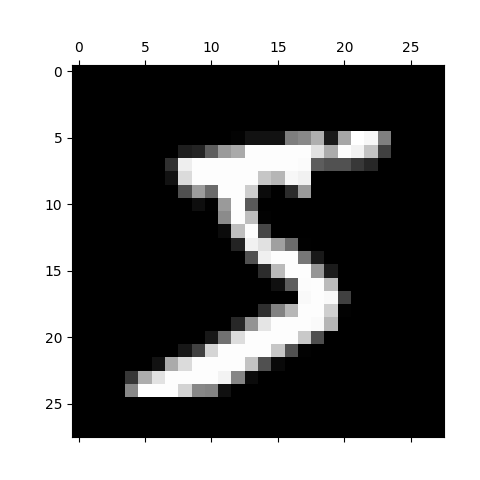

In [4]:
a = X[0].reshape(28, 28)
plt.matshow(a, cmap='gray')

<a name='4'></a>
# 4. Prepare the Data

In [5]:
y = y.astype(np.uint8)

In [6]:
# Split the dataset (X, y) into two sets: A training and a temporary set (X_, y_).
split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=51)
for train_index, test_index in split.split(X, y):
    X_train, X_ = X[train_index], X[test_index]
    y_train, y_ = y[train_index], y[test_index]

In [7]:
# Split the temp set (X_, y_) into two sets: A validation and a test set.
split2 = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=51)
for train_index, test_index in split2.split(X_, y_):
    X_val, X_test = X[train_index], X[test_index]
    y_val, y_test = y[train_index], y[test_index]

In [8]:
print('Shape of the traning features (X_train): ', X_train.shape)
print('Shape of the training targets (y_train): ', y_train.shape, '\n')

print('Shape of the validation features (X_val): ', X_val.shape)
print('Shape of the validation targets (y_val): ', y_val.shape, '\n')

print('Shape of the test featrues (X_test): ', X_test.shape)
print('Shape of the target features (y_test): ', y_test.shape)

Shape of the traning features (X_train):  (50000, 784)
Shape of the training targets (y_train):  (50000,) 

Shape of the validation features (X_val):  (10000, 784)
Shape of the validation targets (y_val):  (10000,) 

Shape of the test featrues (X_test):  (10000, 784)
Shape of the target features (y_test):  (10000,)


In [9]:
# Scale down the features of each dataset.
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

<a name='5'></a>
# 5. Train a Neural Network.

In [11]:
# Train the model.
tf.random.set_seed(51)
model = Sequential(
    [                     
        Dense(25, activation = 'relu', name="L1"),
        Dense(15, activation = 'relu', name="L2"),
        Dense(10, name="L3")

    ], name = "model_0" 
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    X_train,y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 0.4410 - accuracy: 0.8738 - val_loss: 0.2516 - val_accuracy: 0.9267
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2253 - accuracy: 0.9341 - val_loss: 0.1895 - val_accuracy: 0.9438
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1839 - accuracy: 0.9472 - val_loss: 0.1629 - val_accuracy: 0.9518
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1599 - accuracy: 0.9538 - val_loss: 0.1415 - val_accuracy: 0.9597
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1433 - accuracy: 0.9578 - val_loss: 0.1278 - val_accuracy: 0.9634
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1310 - accuracy: 0.9611 - val_loss: 0.1349 - val_accuracy: 0.9598
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1194 - accuracy: 0.9645 - val_loss: 0.1158 - val_

In [ ]:
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Evaluate the model on the test set.
eval = model.evaluate(X_test, y_test, batch_size=2)

   1/5000 [..............................] - ETA: 3:28 - loss: 3.3733 - accuracy: 0.5000

5000/5000 [==============================] - 35s 7ms/step - loss: 0.0952 - accuracy: 0.9711
